<a href="https://colab.research.google.com/github/Mrsth/Pandas_practice/blob/master/WHO_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning/Decision Tree/country_wise_latest.csv', index_col= None)
df1.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [ ]:
print("Total numbers of instances/rows = ",len(df1))

Total numbers of instances/rows =  187


# **Data munging**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

**Conclusion:** There are no null values.

In [ ]:
df1.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [ ]:
df1.rename(columns = {"Country/Region": "Country"}, inplace=True)
df1

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# **Total number of instances in each WHO region**

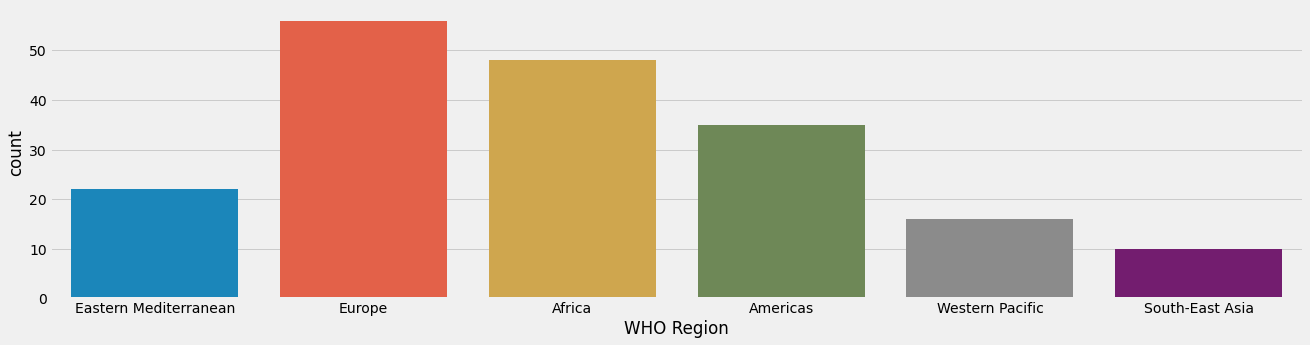

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,5))
sns.countplot(x="WHO Region", data=df1)

In [ ]:
df1["WHO Region"].value_counts()

Europe                   56
Africa                   48
Americas                 35
Eastern Mediterranean    22
Western Pacific          16
South-East Asia          10
Name: WHO Region, dtype: int64

# **Total number of deaths w.r.t WHO Regions**

In [ ]:
death_info_WHO = df1.groupby(["WHO Region"])[["Deaths"]].agg(["max","min","mean"])
death_info_WHO

Deaths                 
                          max min         mean
WHO Region                                    
Africa                   7067   0   254.645833
Americas               148011   0  9792.342857
Eastern Mediterranean   15912  11  1742.681818
Europe                  45844   0  3770.428571
South-East Asia         33408   0  4134.900000
Western Pacific          4656   0   515.562500

In [ ]:
death_info_WHO.reset_index(inplace=True)

In [ ]:
death_info_WHO

WHO Region  Deaths                 
                             max min         mean
0                 Africa    7067   0   254.645833
1               Americas  148011   0  9792.342857
2  Eastern Mediterranean   15912  11  1742.681818
3                 Europe   45844   0  3770.428571
4        South-East Asia   33408   0  4134.900000
5        Western Pacific    4656   0   515.562500

In [ ]:
death_info_WHO.columns = ["WHO_Region","Max Death","Min Death","Average Death"]
death_info_WHO

,WHO_Region,Max Death,Min Death,Average Death
0,Africa,7067,0,254.645833
1,Americas,148011,0,9792.342857
2,Eastern Mediterranean,15912,11,1742.681818
3,Europe,45844,0,3770.428571
4,South-East Asia,33408,0,4134.900000
5,Western Pacific,4656,0,515.562500


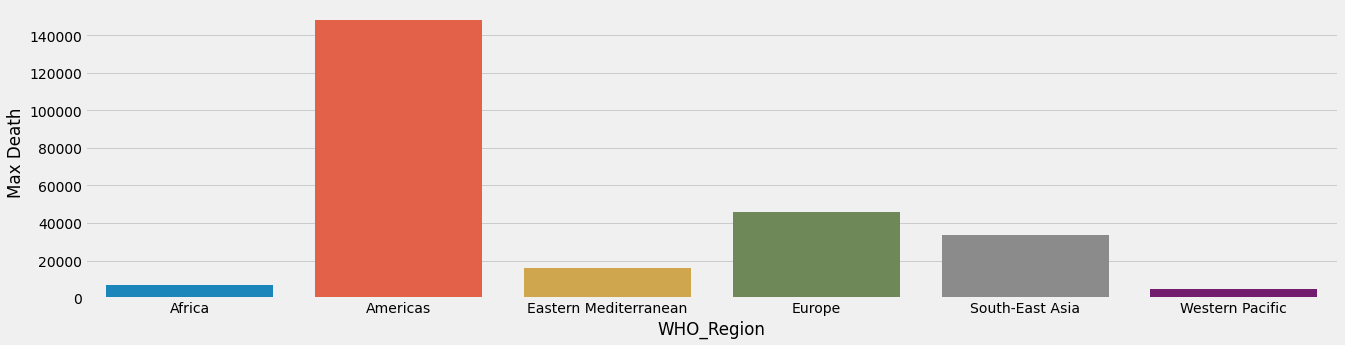

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(data=death_info_WHO, x = "WHO_Region", y = "Max Death")

In [ ]:
death_info_WHO

,WHO_Region,Max Death,Min Death,Average Death
0,Africa,7067,0,254.645833
1,Americas,148011,0,9792.342857
2,Eastern Mediterranean,15912,11,1742.681818
3,Europe,45844,0,3770.428571
4,South-East Asia,33408,0,4134.900000
5,Western Pacific,4656,0,515.562500


In [ ]:
df1.head()

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


# **Total number of recovered patiets w.r.t. the WHO Region**

In [ ]:
list1 = ["Country","Confirmed", "Deaths", "Recovered", "WHO Region"]
recovered_info_WHO = df1[list1]
recovered_info_WHO.head()

,Country,Confirmed,Deaths,Recovered,WHO Region
0,Afghanistan,36263,1269,25198,Eastern Mediterranean
1,Albania,4880,144,2745,Europe
2,Algeria,27973,1163,18837,Africa
3,Andorra,907,52,803,Europe
4,Angola,950,41,242,Africa


In [ ]:
min_max_recovery = recovered_info_WHO.groupby(["WHO Region"])[["Recovered"]].agg(["max","min","mean"])
min_max_recovery

Recovered                   
                            max min           mean
WHO Region                                        
Africa                   274925   0    9180.104167
Americas                1846641   0  127674.742857
Eastern Mediterranean    255144   0   54609.090909
Europe                   602249   0   35602.196429
South-East Asia          951166   0  115693.300000
Western Pacific           78869  11   12923.125000

In [ ]:
min_max_recovery.reset_index(inplace=True)

In [ ]:
min_max_recovery

WHO Region Recovered                   
                               max min           mean
0                 Africa    274925   0    9180.104167
1               Americas   1846641   0  127674.742857
2  Eastern Mediterranean    255144   0   54609.090909
3                 Europe    602249   0   35602.196429
4        South-East Asia    951166   0  115693.300000
5        Western Pacific     78869  11   12923.125000

# **Active case per WHO Region**

In [ ]:
df1.head()

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [ ]:
#Number of active cases in each WHO Region

active_cases_WHO = df1.groupby(["WHO Region"])[["Active"]].agg(["sum"])
active_cases_WHO

,Active
,sum
WHO Region,
Africa,270339
Americas,4027938
Eastern Mediterranean,251005
Europe,1094656
South-East Asia,637015
Western Pacific,77409


In [ ]:
#CROSS CHECKING
# only_africa = df1.loc[df1["WHO Region"] == "Africa"][["Active"]]
# only_america = df1.loc[df1["WHO Region"] == "Americas"][["Active"]]

# print("Africa = ", only_africa["Active"].agg(["sum"]), "America = ", only_america["Active"].agg(["sum"]))

In [ ]:
active_cases_WHO.reset_index(inplace=True)

In [ ]:
active_cases_WHO

,WHO Region,Active
,,sum
0,Africa,270339
1,Americas,4027938
2,Eastern Mediterranean,251005
3,Europe,1094656
4,South-East Asia,637015
5,Western Pacific,77409


In [ ]:
active_cases_WHO.columns = ["WHO Regions","Total active cases"]
active_cases_WHO

,WHO Regions,Total active cases
0,Africa,270339
1,Americas,4027938
2,Eastern Mediterranean,251005
3,Europe,1094656
4,South-East Asia,637015
5,Western Pacific,77409


[Text(0.5, 1.0, 'Total active cases in each region')]

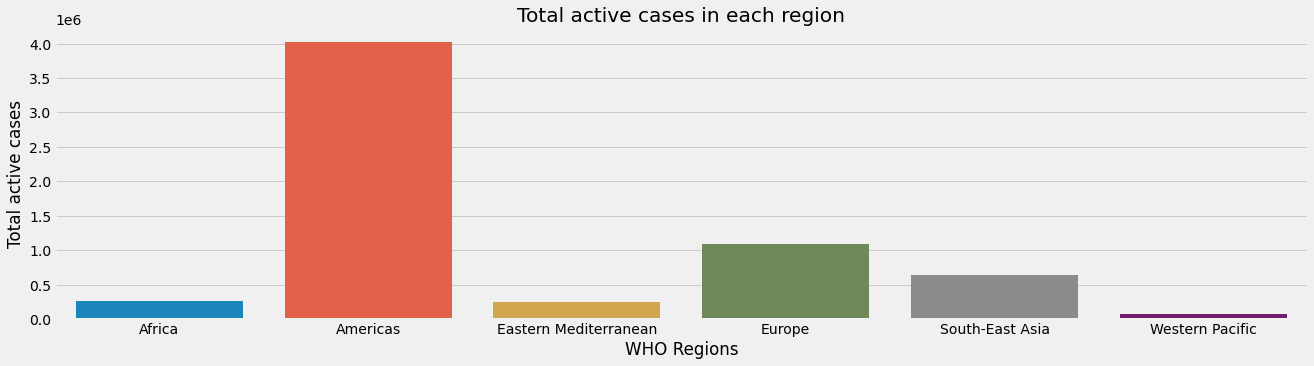

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(data = active_cases_WHO, x = "WHO Regions", y = "Total active cases").set(title="Total active cases in each region")